## Getting Started with Images

This notebook is a quick introduction to working with images in Python. We will use the OpenCV library to load and display images, and to perform some basic image processing operations.

### Topics Covered

- Reading an image
- Check image attributes like datatype, shape, etc.
- Matrix representation of an image in NumPy
- Color Image and splitting/merging image channels
- Displaying an image using matplotlib
- Saving an image

### Importing Libraries


In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt

from zipfile import ZipFile
from urllib.request import urlretrieve

from IPython.display import Image

%matplotlib inline

## Download Assets

The `download_and_unzip(...)` is used to download and extract the notebook assests.


In [3]:
def download_and_unzip(url, save_path):
    print(f"Downloading and extracting assests....", end="")

    # Downloading zip file using urllib package.
    urlretrieve(url, save_path)

    try:
        # Extracting zip file using the zipfile package.
        with ZipFile(save_path) as z:
            # Extract ZIP file contents in the same directory.
            z.extractall(os.path.split(save_path)[0])

        print("Done")

    except Exception as e:
        print("\nInvalid file.", e)

In [4]:
URL = r"https://www.dropbox.com/s/qhhlqcica1nvtaw/opencv_bootcamp_assets_NB1.zip?dl=1"

asset_zip_path = os.path.join(os.getcwd(), f"opencv_bootcamp_assets_NB1.zip")

# Download if assest ZIP does not exists. 
if not os.path.exists(asset_zip_path):
    download_and_unzip(URL, asset_zip_path)   

The opencv_bootcamp_assets_NB1.zip` file includes also contains the additional **display_image.py** python script.


In [5]:
# Display 18x18 pixel image.
Image(filename="checkerboard_18x18.png")

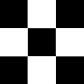

In [6]:
# Display 84x84 pixel image.
Image(filename="checkerboard_84x84.jpg")

## Reading images using OpenCV

OpenCV allows reading different types of images (JPG, PNG, etc). You can load gryscale images, color images or you can also load images with Alpha channel. It uses the cv2.imread() function to read an image.

**Function Syntax:**

```python
retval = cv2.imread(filename[, flags])
```

`retval` is the images if the image is successfully loaded, otherwise it is None. This may due to the wrong path or the wrong image format.

The function has 1 required argument and 1 optional argument:

- `filename`: The path to the image file. Can be a relative or absolute path. This is a **mandatory** argument.
- `flags`: It specifies the way in which the image should be read. It's an optional argument. It can take the following values:
  - `cv2.IMREAD_COLOR` or `1`: It specifies to load a color image. Any transparency of image will be neglected. It is the default flag.
  - `cv2.IMREAD_GRAYSCALE` or `0`: It specifies to load an image in grayscale mode.
  - `cv2.IMREAD_UNCHANGED` or `-1`: It specifies to load an image as such including alpha channel.


## OpenCV Documentation

1. [Imread](https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#ga288b8b3da0892bd651fce07b3bbd3a56)
2. [ImreadModes](https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga61d9b0126a3e57d9277ac48327799c80)


In [7]:
# Read image in grayscale.
cb_img = cv2.imread("checkerboard_18x18.png", cv2.IMREAD_GRAYSCALE)

# Print the image data (pixel values). Each pixel value is between 0-255.
print(cb_img)

[[  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [255 255 255 255 255 255   0   0   0   0   0   0 255 255 255 255 255 255]
 [  0   0   0   0   0   0 255 255 255 255 255 255   0   0   0   0   0   0]
 [  0   0   0   0   0   0

## Display Image Attributes


In [8]:
 # Print the size of the image.
print("Image sieze (rows, cols):", cb_img.shape)

# Display data type of the image.
print("Image data type:", cb_img.dtype)

Image sieze (rows, cols): (18, 18)
Image data type: uint8


## Display Images using Matplotlib


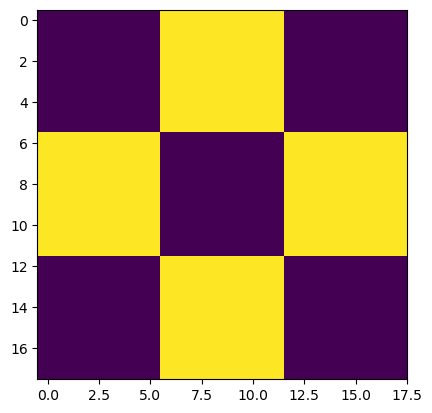

In [9]:
# Display image.
plt.imshow(cb_img)

### What happens?

The image is displayed in a colormap. The colormap is a mapping from scalar values to colors.  
The default colormap is `viridis`. The color of the pixel is determined by the pixel value.


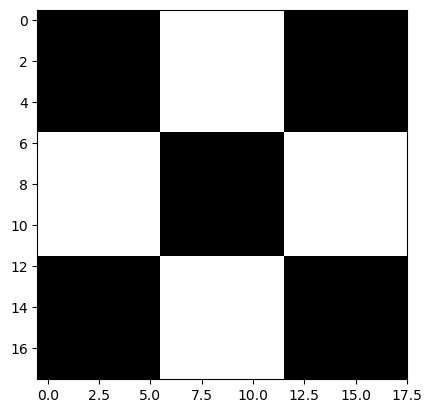

In [13]:
# Set te color map to grayscale for better visualization.
plt.imshow(cb_img, cmap="gray")

## Anothere example


[[  0   0  15  20   1 134 233 253 253 253 255 229 130   1  29   2   0   0]
 [  0   1   5  18   0 137 232 255 254 247 255 228 129   0  24   2   0   0]
 [  7   5   2  28   2 139 230 254 255 249 255 226 128   0  27   3   2   2]
 [ 25  27  28  38   0 129 236 255 253 249 251 227 129   0  36  27  27  27]
 [  2   0   0   4   2 130 239 254 254 254 255 230 126   0   4   2   0   0]
 [132 129 131 124 121 163 211 226 227 225 226 203 164 125 125 129 131 131]
 [234 227 230 229 232 205 151 115 125 124 117 156 205 232 229 225 228 228]
 [254 255 255 251 255 222 102   1   0   0   0 120 225 255 254 255 255 255]
 [254 255 254 255 253 225 104   0  50  46   0 120 233 254 247 253 251 253]
 [252 250 250 253 254 223 105   2  45  50   0 127 223 255 251 255 251 253]
 [254 255 255 252 255 226 104   0   1   1   0 120 229 255 255 254 255 255]
 [233 235 231 233 234 207 142 106 108 102 108 146 207 235 237 232 231 231]
 [132 132 131 132 130 175 207 223 224 224 224 210 165 134 130 136 134 134]
 [  1   1   3   0   0 129

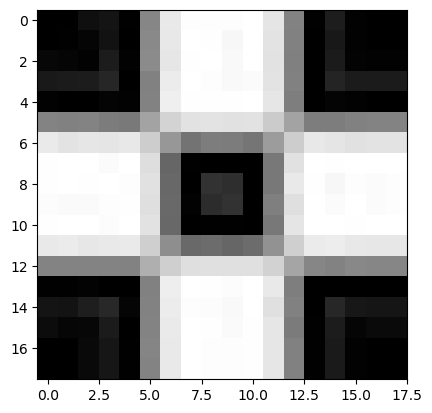

In [22]:
# Read image in grayscale.
cb_img_fuzzy = cv2.imread("checkerboard_fuzzy_18x18.jpg", cv2.IMREAD_GRAYSCALE)

# Print image data (pixel values).
print(cb_img_fuzzy)

# Display image.
plt.imshow(cb_img_fuzzy, cmap="gray")

## Working with Color Images

Color images are represented as 3D NumPy arrays. The dimensions of the array are `(height, width, channels)`. The channels are usually Red, Green, and Blue (RGB) channels.


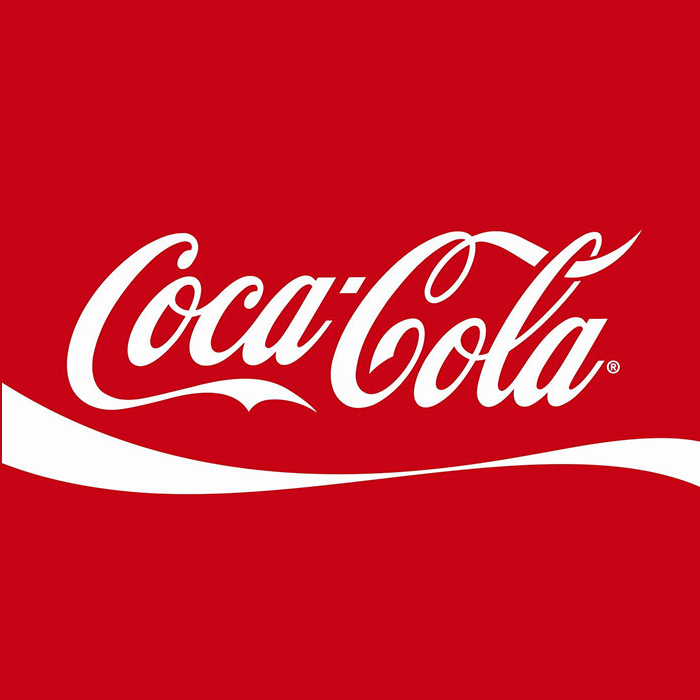

In [24]:
# Read and display image in color.
Image("coca-cola-logo.png")

## Read and display a color image

Let read a color image and check the parameters of the image.


In [25]:
# Read image in color.
coca_cola_img = cv2.imread("coca-cola-logo.png", cv2.IMREAD_COLOR)

# Print the size of the image.
print("Image size (rows, cols, channels):", coca_cola_img.shape)

# Print the data type of the image.
print("Image data type:", coca_cola_img.dtype)

Image size (rows, cols, channels): (700, 700, 3)
Image data type: uint8


## Display the image


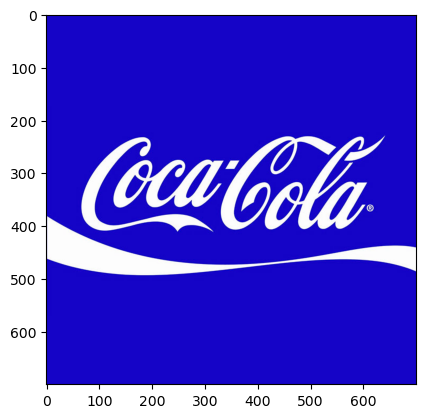

In [26]:
plt.imshow(coca_cola_img)

The color difference is due to the default colormap used by Matplotlib. Matplotlib expects the image in RGB format, but OpenCV reads the image in BGR format. So, we need to convert the image from BGR to RGB format before displaying it.


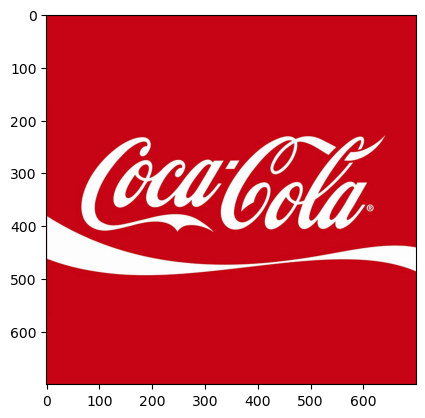

In [27]:
# Reverse the color channels.
coca_cola_img_rgb = coca_cola_img[:, :, ::-1]
plt.imshow(coca_cola_img_rgb)

## Splitting and Merging Color Channels

Color channels can be split and merged using the following functions:

- `cv2.split()`: Splits an image into its color channels.
- `cv2.merge()`: Merges the color channels into a single image. The number of channels must match the number of channels in the image.


Text(0.5, 1.0, 'Merged Image')

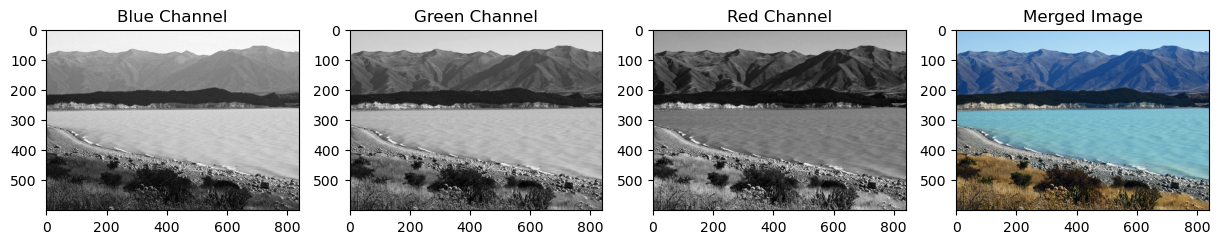

In [30]:
# Split ht e image into BGR channels.
img_NZ_bgr = cv2.imread("New_Zealand_Lake.jpg", cv2.IMREAD_COLOR)
b, g, r = cv2.split(img_NZ_bgr)

# Display the BGR channels.
plt.figure(figsize=(15, 5))

# 1 row, 4 columns, 1st subplot.
plt.subplot(141);  plt.imshow(b, cmap="gray"); plt.title("Blue Channel")
# 1 row, 4 columns, 2nd subplot.
plt.subplot(142); plt.imshow(g, cmap="gray"); plt.title("Green Channel")
 # 1 row, 4 columns, 3rd subplot.
plt.subplot(143); plt.imshow(r, cmap="gray"); plt.title("Red Channel")

# Merge the BGR channels.
img_NZ_merged = cv2.merge((b, g, r))

# Display the merged image.
plt.subplot(144) # 1 row, 4 columns, 4th subplot.
plt.imshow(img_NZ_bgr[:, :, ::-1])
plt.title("Merged Image")

## Converting to different Color Spaces

**`cv2.cvtColor()`** Converts an image from one color space to another. The function converts an input image from one color space to another. In case of a transformation to-from RGB color space, the order of the channels should be specified explicitly (RGB or BGR). Note that the default color format in OpenCV is often referred to as RGB but it is actually BGR (the bytes are reversed). So the first byte in a standard (24-bit) color image will be an 8-bit Blue component, the second byte will be Green, and the third byte will be Red. The fourth, fifth, and sixth bytes would then be the second pixel (Blue, then Green, then Red), and so on.


# Function Syntax

```python
dst = cv2.cvtColor(src, code)
```

`dst` is the output image of the same size and depth as `src`.

The function has 2 required arguments:

- `src` - input image; it can be an 8-bit unsigned integer, 16-bit unsigned integer, or single-precision floating-point.
- `code` - a flag that specifies how the image should be converted. The following flags are available:
  - `cv2.COLOR_BGR2GRAY`: Converts BGR image to grayscale.
  - `cv2.COLOR_BGR2RGB`: Converts BGR image to RGB.
  - `cv2.COLOR_BGR2HSV`: Converts BGR image to HSV.
  - `cv2.COLOR_BGR2YCrCb`: Converts BGR image to YCrCb.
  - `cv2.COLOR_BGR2XYZ`: Converts BGR image to XYZ.
  - `cv2.COLOR_BGR2LAB`: Converts BGR image to CIE L*a*b\*.
  - `cv2.COLOR_BGR2HLS`: Converts BGR image to HLS.
  - `cv2.COLOR_BGR2YUV`: Converts BGR image to YUV.
  - `cv2.COLOR_BGR2LUV`: Converts BGR image to LUV.
  - `cv2.COLOR_BGR2BGRA`: Converts BGR image to BGRA.
  - `cv2.COLOR_BGR2RGBA`: Converts BGR image to RGBA.
  - `cv2.COLOR_BGR2BGR565`: Converts BGR image to BGR565.
  - `cv2.COLOR_BGR2BGR555`: Converts BGR image to BGR555.
  - `cv2.COLOR_BGR2BGRA5551`: Converts BGR image to BGRA5551.
  - `cv2.COLOR_BGR2GRAY`: Converts BGR image to grayscale.
  - `cv2.COLOR_BGR2BGR`: Converts BGR image to BGR.
  - `cv2.COLOR_BGR2RGB`: Converts BGR image to RGB.
  - `cv2.COLOR_BGR2RGBA`: Converts BGR image to RGBA.
  - `cv2.COLOR_BGR2BGRA`: Converts BGR image to BGRA.
  - `cv2.COLOR_BGR2BGR565`: Converts BGR image to BGR565.
  - `cv2.COLOR_BGR2BGR555`: Converts BGR image to BGR555.
  - `cv2.COLOR_BGR2BGRA5551`: Converts BGR image to BGRA5551.
  - `cv2.COLOR_BGR2GRAY`: Converts BGR image to grayscale.
  - `cv2.COLOR_BGR2BGR`: Converts BGR image to BGR.
  - `cv2.COLOR_BGR2RGB`: Converts BGR image to RGB.
  - `cv2.COLOR_BGR2RGBA`: Converts BGR image to RGBA.
  - More flags can be found in the [OpenCV documentation](https://docs.opencv.org/4.5.1/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0).

## OpenCV Documentation

1. [CvtColor](https://docs.opencv.org/3.4/d8/d01/group__imgproc__color__conversions.html#ga397ae87e1288a81d2363b61574eb8cab)
2. [Color Conversion codes](https://docs.opencv.org/4.5.1/d8/d01/group__imgproc__color__conversions.html#ga4e0972be5de079fed4e3a10e24ef5ef0)


## Changing Color Spaces from BGR to RGB

In OpenCV, images are loaded in BGR format by default. However, most image processing libraries use the RGB format. So, we need to convert the image from BGR to RGB format before displaying it.


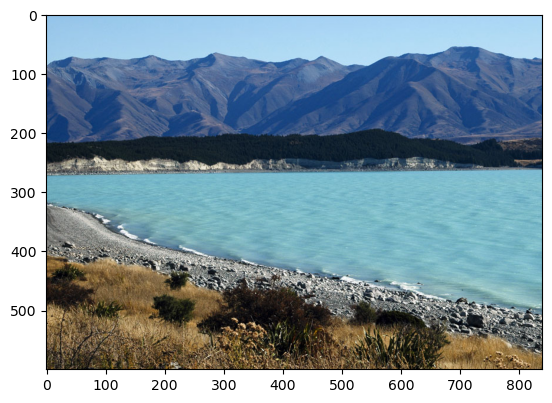

In [31]:
img_NZ_rgb = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_NZ_rgb)

## Changing to HSV Color Space

The HSV (Hue, Saturation, Value) color space is a cylindrical color space that is easy to understand and manipulate. It is often used in color selection, image thresholding, and image segmentation. The HSV color space is more intuitive than the RGB color space for image processing.
To change the image to HSV color space, we can use the `cv2.cvtColor()` function with the `cv2.COLOR_BGR2HSV` flag.


Text(0.5, 1.0, 'Value Channel')

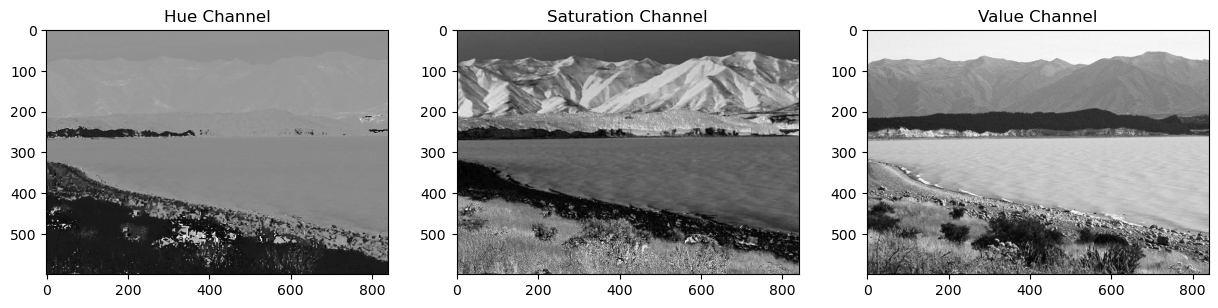

In [33]:
img_NZ_hsv = cv2.cvtColor(img_NZ_bgr, cv2.COLOR_BGR2HSV)

# Split the HSV channels.
h, s, v = cv2.split(img_NZ_hsv)

# Display the HSV channels.
plt.figure(figsize=(15, 5))
plt.subplot(131); plt.imshow(h, cmap="gray"); plt.title("Hue Channel")
plt.subplot(132); plt.imshow(s, cmap="gray"); plt.title("Saturation Channel")
plt.subplot(133); plt.imshow(v, cmap="gray"); plt.title("Value Channel")

## Modifying individual channels

We can modify individual channels of an image by splitting the image into its color channels, modifying the channels, and then merging them back into a single image.


Text(0.5, 1.0, 'Modified Image')

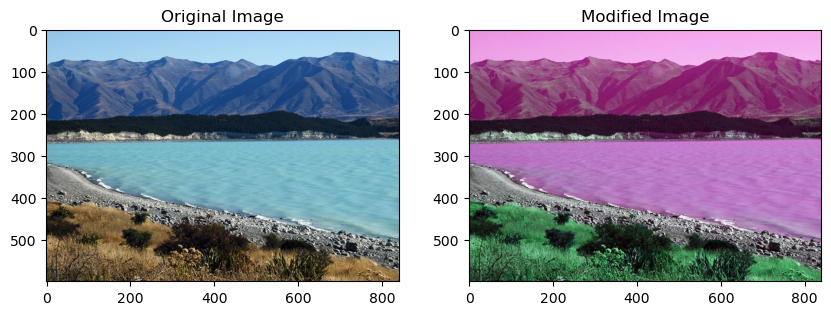

In [34]:
h_new = h + 50
img_NZ_hsv_new = cv2.merge((h_new, s, v))
img_NZ_rgb_new = cv2.cvtColor(img_NZ_hsv_new, cv2.COLOR_HSV2RGB)

# Display the original and modified images.
plt.figure(figsize=(10, 5))
plt.subplot(121); plt.imshow(img_NZ_rgb); plt.title("Original Image")
plt.subplot(122); plt.imshow(img_NZ_rgb_new); plt.title("Modified Image")

## Saving an Image

To save an image, we can use the `cv2.imwrite(filename, img[, params])` function. The function takes the following arguments:

- `filename`: The name of the file to save the image to.
- `img`: The image to save.
- `params`: Optional parameters for the image format. It is a tuple that contains the compression parameters. For PNG, it can be a compression level between 0 and 9. For JPEG, it can be a quality level between 0 and 100.

The function returns a boolean value indicating whether the image was successfully saved or not.

## OpenCV Documentation

- [Imwrite](https://docs.opencv.org/4.5.1/d4/da8/group__imgcodecs.html#gabbc7ef1aa2edfaa87772f1202d67e0ce)
- [ImwriteFlags](https://docs.opencv.org/4.5.1/d8/d6a/group__imgcodecs__flags.html#ga292d81be8d76901bff7988d18d2b42ac)


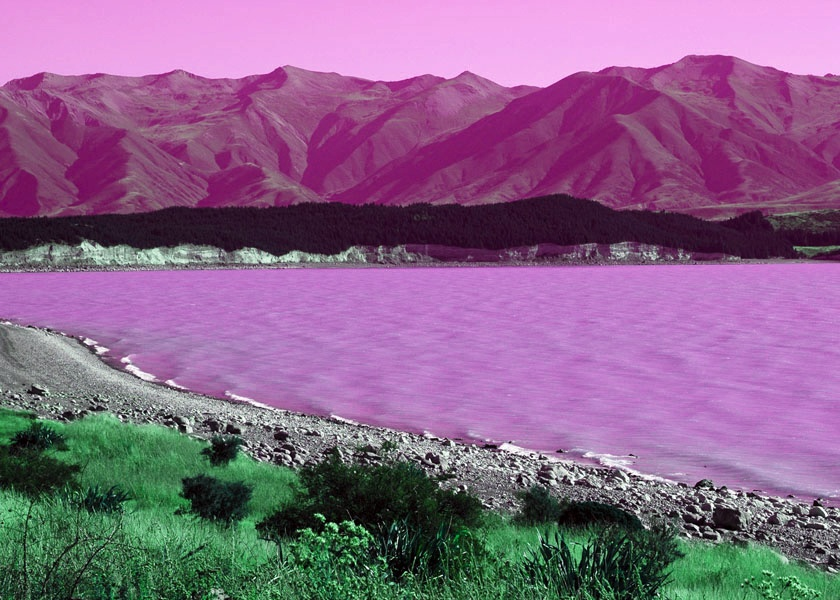

In [35]:
# save the modified image.
cv2.imwrite("New_Zealand_Lake_modified.jpg", cv2.cvtColor(img_NZ_rgb_new, cv2.COLOR_RGB2BGR))
# The image to save is in BGR format. So, convert it to RGB before saving.

# Display the modified image.
Image("New_Zealand_Lake_modified.jpg")